# Load library

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load Datasest

In [2]:
#memanggil data csv
df= pd.read_csv('BRAINACT INJ  250 MG 6.csv', sep=';', usecols=['Tanggal','Bulan', 'Jumlah Obat', 'Harga Satuan', 'Harga Total','Jumlah Pengunjung'])
df.head()

,Tanggal,Bulan,Jumlah Obat,Harga Satuan,Harga Total,Jumlah Pengunjung
0,1,1,18,49610,892980,8
1,2,1,27,49610,1339470,8
2,3,1,19,49610,942590,6
3,4,1,14,49610,694540,6
4,5,1,15,49610,744150,6


In [3]:
df.shape

(302, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 6 columns):
Tanggal              302 non-null int64
Bulan                302 non-null int64
Jumlah Obat          302 non-null int64
Harga Satuan         302 non-null int64
Harga Total          302 non-null int64
Jumlah Pengunjung    302 non-null int64
dtypes: int64(6)
memory usage: 14.2 KB


In [5]:
df.describe()

,Tanggal,Bulan,Jumlah Obat,Harga Satuan,Harga Total,Jumlah Pengunjung
count,302.000000,302.000000,302.000000,302.0,3.020000e+02,302.000000
mean,14.195364,6.592715,18.986755,49610.0,9.419329e+05,8.615894
std,7.942374,3.454932,5.310288,0.0,2.634434e+05,2.494808
min,1.000000,1.000000,4.000000,49610.0,1.984400e+05,2.000000
25%,7.000000,4.000000,15.000000,49610.0,7.441500e+05,7.000000
50%,14.000000,7.000000,18.000000,49610.0,8.929800e+05,8.000000
75%,21.000000,10.000000,23.000000,49610.0,1.141030e+06,10.000000
max,28.000000,12.000000,35.000000,49610.0,1.736350e+06,15.000000


# Handling Missing Value

In [6]:
#Mencari dan menangani missing values
#Ternyata data kita tidak ada missing values
df.isnull().sum()

Tanggal              0
Bulan                0
Jumlah Obat          0
Harga Satuan         0
Harga Total          0
Jumlah Pengunjung    0
dtype: int64

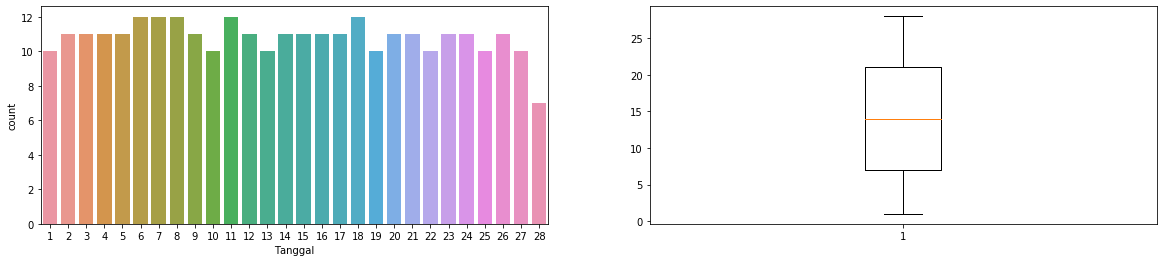

In [7]:
#Univariate analysis jumlah obat
#Melihat distribusi dari jumlah obat
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.countplot(df['Tanggal'])

f.add_subplot(1,2,2)
plt.boxplot(df['Tanggal'])
plt.show()

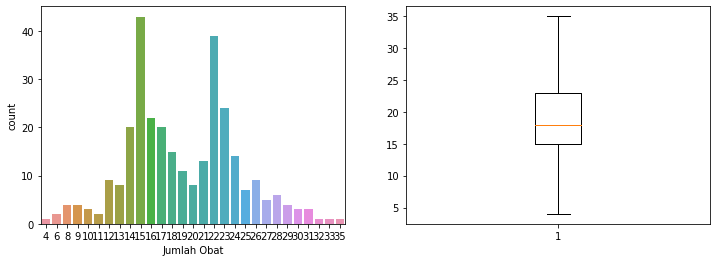

In [8]:
#Univariate analysis jumlah obat
#Melihat distribusi dari jumlah obat
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['Jumlah Obat'])

f.add_subplot(1,2,2)
plt.boxplot(df['Jumlah Obat'])
plt.show()

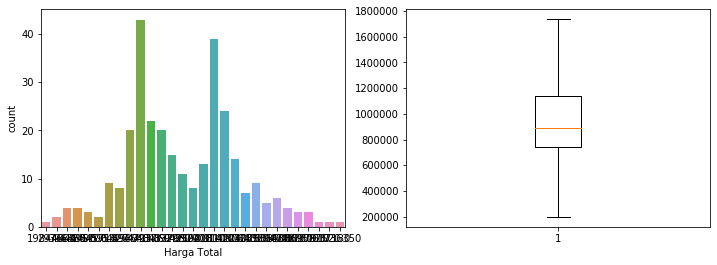

In [9]:
#Univariate analysis jumlah obat
#Melihat distribusi dari jumlah obat
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['Harga Total'])

f.add_subplot(1,2,2)
plt.boxplot(df['Harga Total'])
plt.show()

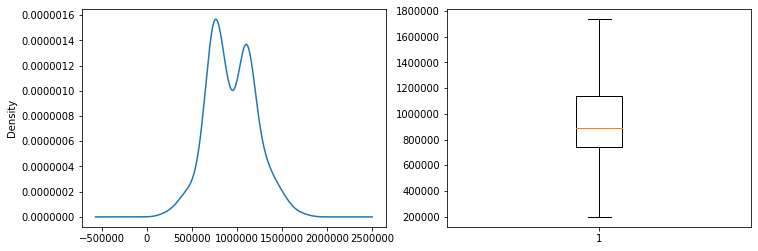

In [10]:
#Univariate analysis 
#Melihat distribusi dari 
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Harga Total'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['Harga Total'])
plt.show()

Density dari Harga total obat berada di sekitar angka 1500000an.

<Figure size 720x576 with 0 Axes>

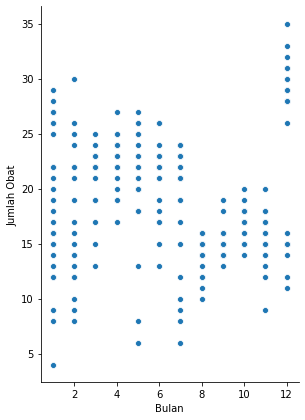

In [21]:
#Bivariate analysis antara independent variable dan dependent variable
#Melihat hubungan antara independent dan dependent
#Menggunakan pairplot#Menggunakan pairplot#Menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['Bulan'], y_vars=['Jumlah Obat'], size=6, aspect=0.75)
plt.show()

<Figure size 720x576 with 0 Axes>

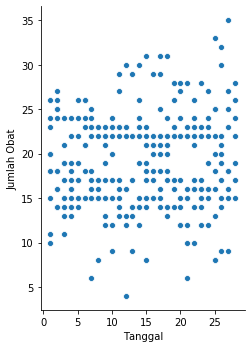

In [12]:
#Bivariate analysis antara independent variable dan dependent variable
#Melihat hubungan antara independent dan dependent
#Menggunakan pairplot#Menggunakan pairplot#Menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['Tanggal'], y_vars=['Jumlah Obat'], size=5, aspect=0.75)
plt.show()

<Figure size 720x576 with 0 Axes>

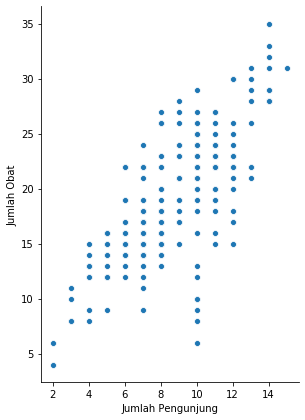

In [22]:
#Bivariate analysis antara independent variable dan dependent variable
#Melihat hubungan antara independent dan dependent
#Menggunakan pairplot#Menggunakan pairplot#Menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['Jumlah Pengunjung'], y_vars=['Jumlah Obat'], size=6, aspect=0.75)
plt.show()

<Figure size 720x576 with 0 Axes>

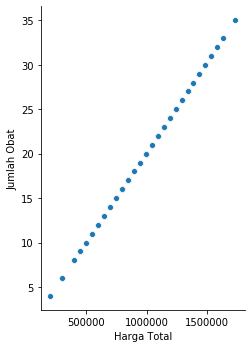

In [14]:
#Bivariate analysis antara independent variable dan dependent variable
#Melihat hubungan antara independent dan dependent
#Menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['Harga Total'], y_vars=['Jumlah Obat'], size=5, aspect=0.75)
plt.show()

In [15]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable

df.corr().style.background_gradient().set_precision(2)

C:\Users\ITD-STU\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Tanggal,Bulan,Jumlah Obat,Harga Satuan,Harga Total,Jumlah Pengunjung
Tanggal,1,-0.0048,0.1,nan,0.1,0.14
Bulan,-0.0048,1,-0.11,nan,-0.11,0.087
Jumlah Obat,0.1,-0.11,1,nan,1,0.75
Harga Satuan,nan,nan,nan,nan,nan,nan
Harga Total,0.1,-0.11,1,nan,1,0.75
Jumlah Pengunjung,0.14,0.087,0.75,nan,0.75,1


# Modelling

In [16]:
#Recall data kita
df.head()

,Tanggal,Bulan,Jumlah Obat,Harga Satuan,Harga Total,Jumlah Pengunjung
0,1,1,18,49610,892980,8
1,2,1,27,49610,1339470,8
2,3,1,19,49610,942590,6
3,4,1,14,49610,694540,6
4,5,1,15,49610,744150,6


In [17]:
#Pertama, buat variabel x dan y
x = df.drop(['Jumlah Obat','Harga Satuan'], axis = 1)
y = df['Jumlah Obat']

In [19]:
x

,Tanggal,Bulan,Harga Total,Jumlah Pengunjung
0,1,1,892980,8
1,2,1,1339470,8
2,3,1,942590,6
3,4,1,694540,6
4,5,1,744150,6
5,6,1,1289860,8
6,7,1,1240250,10
7,8,1,793760,10
8,9,1,744150,5
9,10,1,446490,5


In [20]:
y

0      18
1      27
2      19
3      14
4      15
5      26
6      25
7      16
8      15
9       9
10     27
11      4
12     13
13     26
14     21
15     20
16     29
17     22
18     28
19     12
20     12
21     17
22     16
23     16
24      8
25     22
26     27
27     26
28     17
29     26
       ..
272    18
273    17
274     9
275    11
276    14
277    15
278    15
279    15
280    15
281    15
282    15
283    12
284    29
285    30
286    29
287    30
288    31
289    29
290    31
291    31
292    28
293    28
294    28
295    26
296    28
297    16
298    33
299    32
300    35
301    28
Name: Jumlah Obat, Length: 302, dtype: int64

In [76]:
#Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [77]:
#Cek shape dari data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(241, 4)
(241,)
(61, 4)
(61,)


In [78]:
#Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [79]:
#Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-3.79443649e-18  1.83446438e-16  2.01572264e-05  2.14767743e-17]
-1.0658141036401503e-14


In [81]:
#Kita coba buat kedalam dataframe agar kebih rapi
coef_dict = {
    'features': x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,Tanggal,-3.794436e-18
1,Bulan,1.834464e-16
2,Harga Total,2.015723e-05
3,Jumlah Pengunjung,2.147677e-17


dari nilai harga total obat dan jumlah pengunjung diatas, kalau dimasukan ke dalam rumus menjadi: Y =

In [82]:
y_pred = lin_reg.predict(x_test)

In [83]:
#Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

1.0

In [84]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 2.7227764669495643e-15
Mean Squared Error (MSE): 1.4134835564042063e-29
Root Mean Squared Error (RMSE): 3.759632370863149e-15


In [86]:
#Prediksi jumlah obat
#lin_reg.predict([[29,1,446490, 3]])
y_pred

array([26., 10., 28., 21., 15., 14., 29., 15., 26., 18., 13., 15., 25.,
       14., 22., 12., 17.,  8., 33., 17., 22., 20., 14., 26., 28., 15.,
       21., 22., 16., 25., 23., 19., 14., 10., 25., 22., 22., 19., 18.,
       26., 30., 21., 16., 23., 21., 23., 14., 24., 18., 27., 22., 15.,
       13., 16., 26., 17., 15., 11.,  4., 22., 14.])